# HR Employee Attrition Analysis

In [1]:
#import neecessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# EDA

**1.Overall Attrition Rate:** 
    Calculate the overall attrition rate at XYZ Company over the past year.
    
** TASK - 1 **

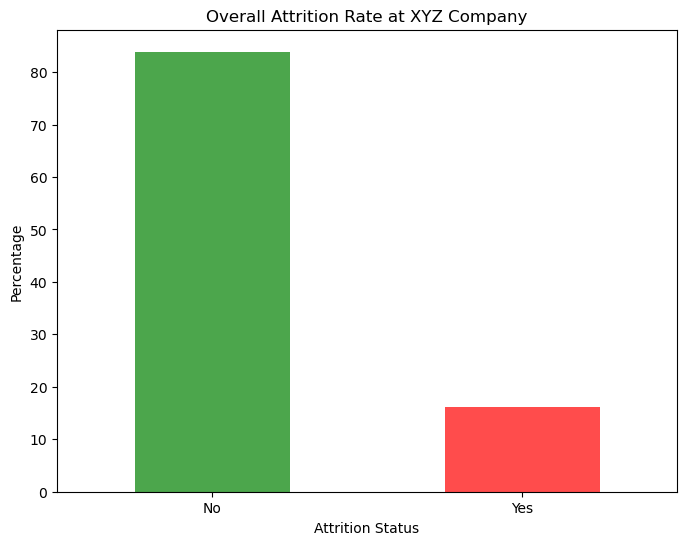

In [7]:
# Calculate the overall attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100

# Plotting the attrition rate
plt.figure(figsize=(8, 6))
attrition_rate.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Overall Attrition Rate at XYZ Company')
plt.xlabel('Attrition Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

TASK - 3

**3. Employee Satisfaction and Attrition:** Analyse the relationship between employee satisfaction and attrition.

C:\Users\sound\AppData\Local\Temp\ipykernel_4160\479997158.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Attrition', y='JobSatisfaction', data=df, ci=None)


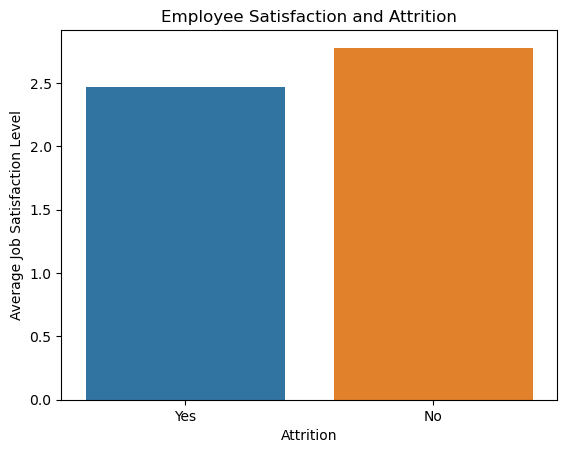

In [9]:
# Analyze the relationship between employee satisfaction and attrition
sns.barplot(x='Attrition', y='JobSatisfaction', data=df, ci=None)
plt.title('Employee Satisfaction and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Job Satisfaction Level')
plt.show()

TASK - 4

**4.Job Levels and Attrition:** Compare the attrition rates of employees with different job levels.

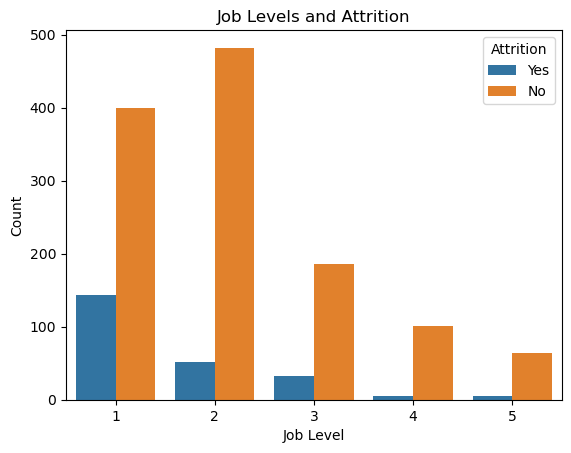

In [10]:
# Analyze the relationship between job levels and attrition
sns.countplot(x='JobLevel', hue='Attrition', data=df)
plt.title('Job Levels and Attrition')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.show()

TASK - 5 

***5.Job Roles and Attrition: Compare the attrition rates of employees with different job roles.***

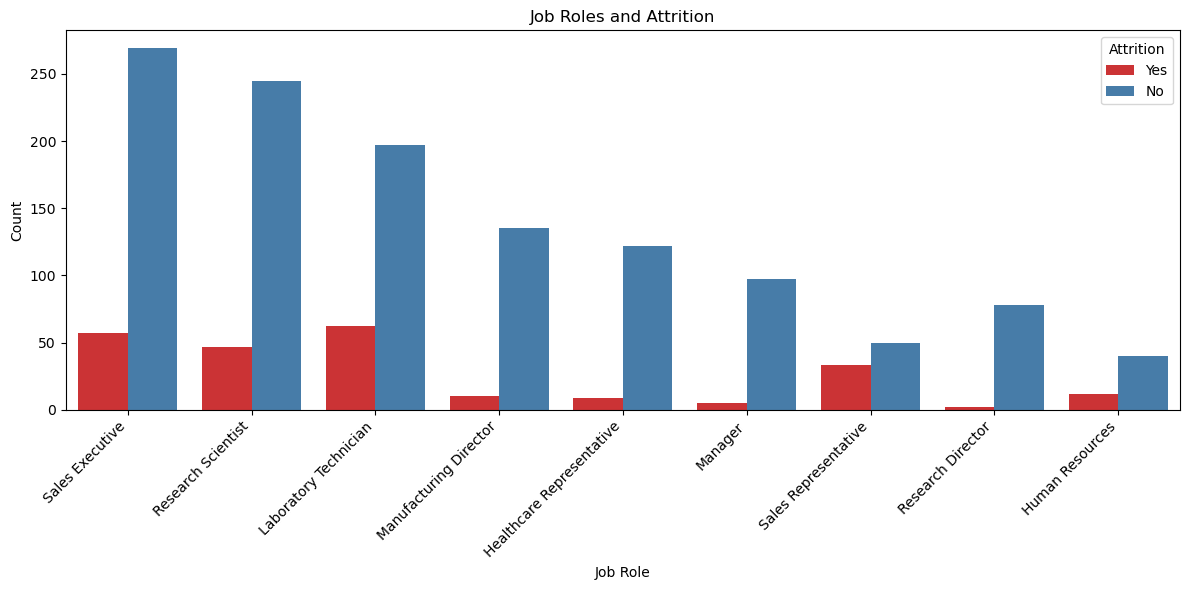

In [11]:
# Analyze the relationship between job roles and attrition
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visualization
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set1')
plt.title('Job Roles and Attrition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

TASK - 6

***6. Employee Age and Attrition:Analyse the relationship between employee age and attrition.***

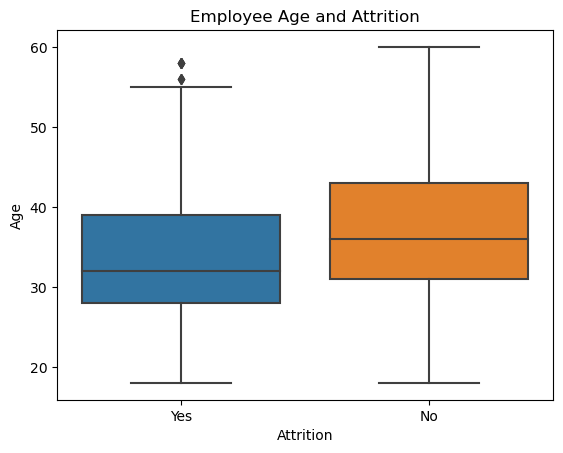

In [12]:
# Analyze the relationship between employee age and attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Employee Age and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

TASK - 7

***7. Education and Attrition: Compare the attrition rates of employees with different levels of education.***

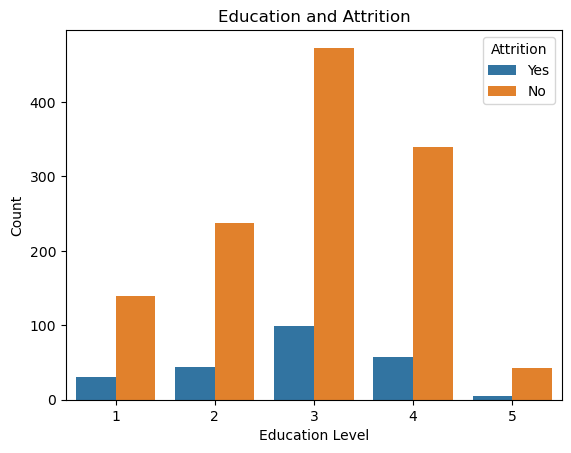

In [13]:
# Analyze the relationship between education and attrition
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Education and Attrition')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

TASK - 8

***8. Work Experience and Attrition: Compare the attrition rates of employees with different work experience***

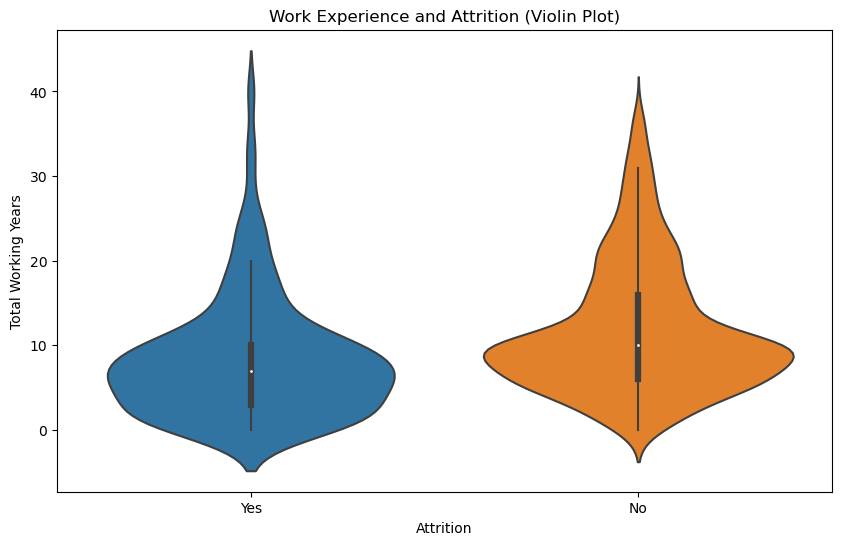

In [14]:
# Violin plot for Work Experience and Attrition
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Work Experience and Attrition (Violin Plot)')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()


TASK - 9

***9. Gender and Attrition: How is attrition affected by gender***

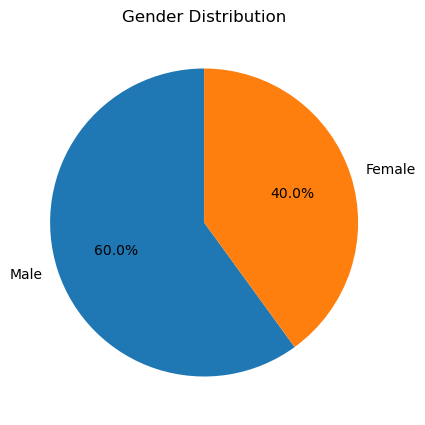

In [16]:
# Pie chart for Gender distribution
gender_distribution = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


TASK - 10

***10. Business Travel and Attrition: How is attrition affected by business travel***

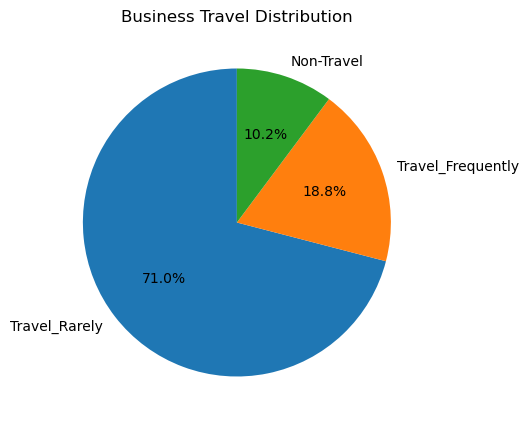

In [17]:
# Pie chart for Business Travel distribution
travel_distribution = df['BusinessTravel'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(travel_distribution, labels=travel_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Business Travel Distribution')
plt.show()